## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse (3)

##### Werkzeuge und Daten importieren

In [1]:
from funktionen import *
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import math
from scipy import stats
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set(style="whitegrid") #"white", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
#Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2017-19_ber')

In [2]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Analyse')

In [64]:
#Daten.head(3)

In [3]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

##### Untergruppen und Listen für die Analyse

In [66]:
#Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [67]:
#Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]

In [68]:
#Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [69]:
#Liste_A_Q4 = [col for col in Daten.columns if 'A-Q4' in col]

In [70]:
#Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]

In [4]:
Liste_Var = [col for col in Daten.columns if 'V_' in col]

Um mit fehlenden Werten umzugehen, werden zwei Ansätze verfolgt:
1. Fehlende Werte werden durch den Modus (meist gewählten Wert) ersetzt. (Daten1)
2. TN mit fehlenden Werten werden von der Analyse ausgeschlossen. (Daten2)

In [6]:
#print((Daten[Liste_Var] == 0).sum())

In [7]:
Daten1 = Daten[:]

In [8]:
Daten1[Liste_Var] = Daten1[Liste_Var].replace(0, numpy.NaN)

In [10]:
#print(Daten1[Liste_Var].isnull().sum())

In [15]:
Daten2 = Daten1[:]

In [16]:
Daten2 = Daten2.dropna()

In [17]:
Daten2.shape

(343, 96)

In [22]:
Daten1['V_Studienrichtung'].value_counts()

1.0    162
2.0    129
3.0     70
4.0     29
Name: V_Studienrichtung, dtype: int64

In [21]:
for column in ['V_Studienrichtung', 'V_Alter','V_Geschlecht']:
    Daten1[column].fillna(Daten1[column].mode()[0], inplace=True)

In [22]:
Daten1['V_Studienrichtung'].value_counts()

1.0    162
2.0    129
3.0     70
4.0     29
Name: V_Studienrichtung, dtype: int64

##### Analyse...

In [113]:
# Liste_Var1 = ... 

#### Scores in A3 (nach Quartilen)

In [35]:
X = Daten1[Liste_Var]
y = Daten1['A-Q4_Score_qu']

In [40]:
clf = RandomForestClassifier(n_estimators=200,max_features='sqrt',min_samples_leaf=10)
clf = clf.fit(X, y)

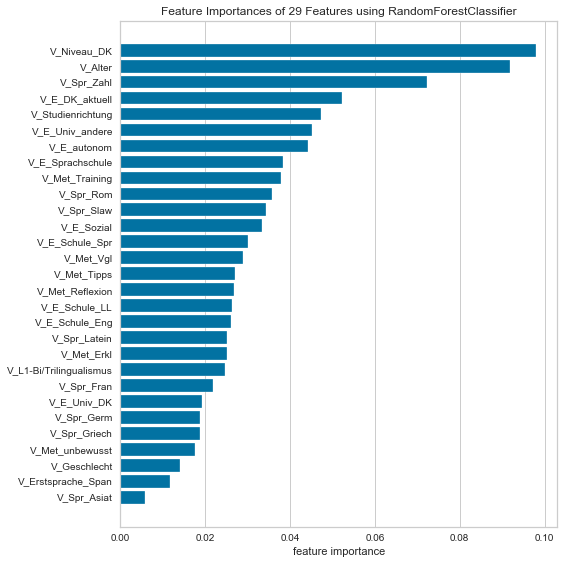

In [41]:
from yellowbrick.features.importances import FeatureImportances

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

viz = FeatureImportances(clf, ax=ax, relative=False)
viz.fit(X, y)
viz.poof()

In [26]:
X = Daten2[Liste_Var]
y = Daten2['A-Q4_Score_qu']

In [27]:
clf = RandomForestClassifier(n_estimators=200,max_features='sqrt')
clf = clf.fit(X, y)

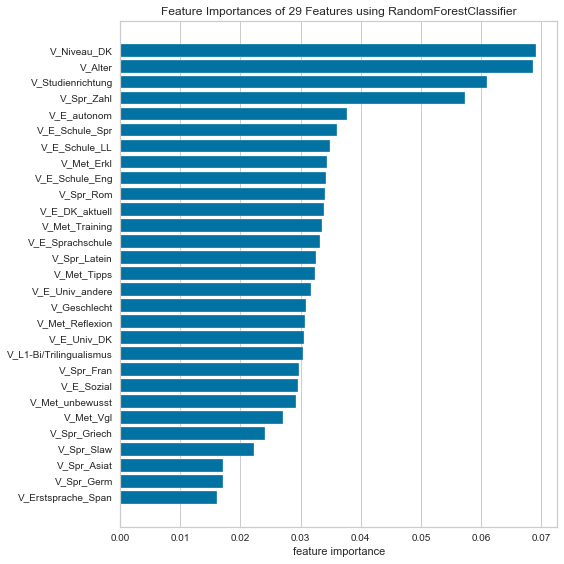

In [28]:
from yellowbrick.features.importances import FeatureImportances

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

viz = FeatureImportances(clf, ax=ax, relative=False)
viz.fit(X, y)
viz.poof()

#### Mindestanzahl an Strategien (Likert-Wert mind. 3) in jeder Strategiengruppe 

In [42]:
X = Daten1[Liste_Var]
y = Daten1['A-Q4_Stratgr_all']

In [50]:
clf = RandomForestClassifier(n_estimators=200,max_features='sqrt')
clf = clf.fit(X, y)

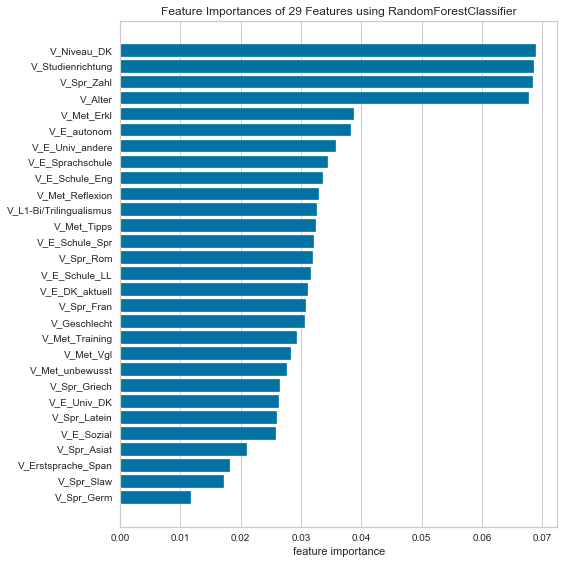

In [51]:
from yellowbrick.features.importances import FeatureImportances

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

viz = FeatureImportances(clf, ax=ax, relative=False)
viz.fit(X, y)
viz.poof()

In [32]:
X = Daten2[Liste_Var]
y = Daten2['A-Q4_Stratgr_all']

In [33]:
clf = RandomForestClassifier(n_estimators=200,max_features='sqrt')
clf = clf.fit(X, y)

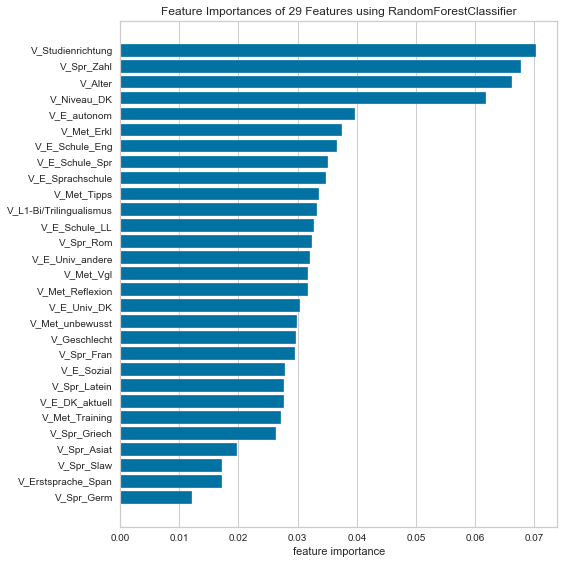

In [34]:
from yellowbrick.features.importances import FeatureImportances

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

viz = FeatureImportances(clf, ax=ax, relative=False)
viz.fit(X, y)
viz.poof()

In [143]:
clf = tree.DecisionTreeClassifier(#min_samples_leaf=10,
                                  #min_samples_split=8,
                                  max_features='auto',
                                  #max_depth=8,
                                  random_state = 12)
clf = clf.fit(X, y)

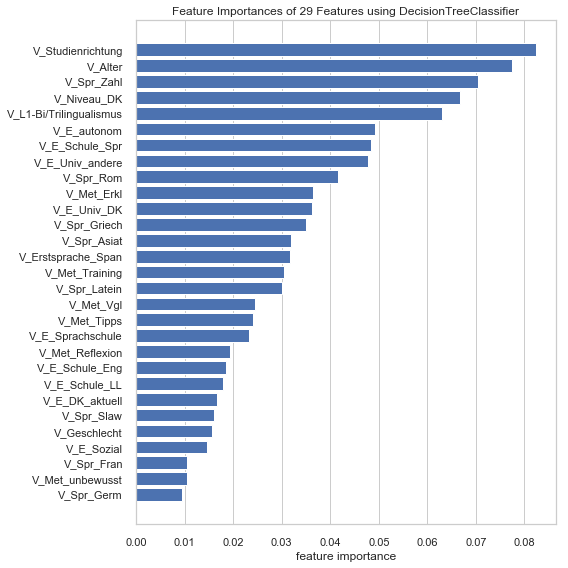

In [141]:
from yellowbrick.features.importances import FeatureImportances

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

viz = FeatureImportances(clf, ax=ax, relative=False)
viz.fit(X, y)
viz.poof()

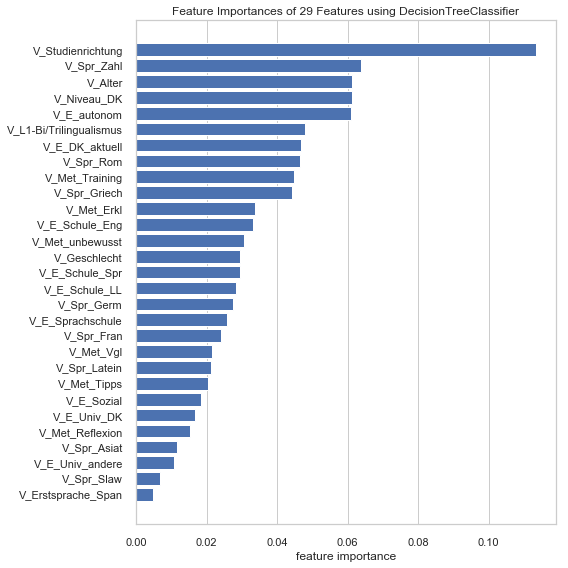

In [144]:
from yellowbrick.features.importances import FeatureImportances

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

viz = FeatureImportances(clf, ax=ax, relative=False)
viz.fit(X, y)
viz.poof()

C:\Users\Martina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Martina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Martina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Martina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Martina\Anaconda3\lib\site-packages\sklearn

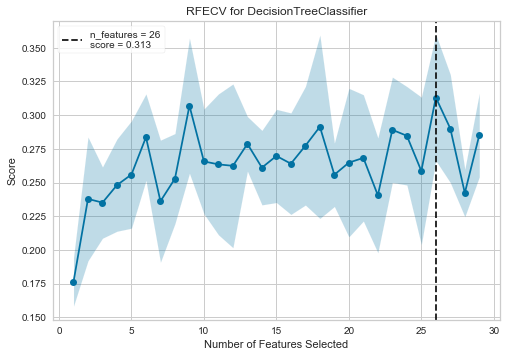

In [54]:
from yellowbrick.features import RFECV
# Create RFECV visualizer with clf
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, random_state = 12)
viz = RFECV(clf, cv=cv, scoring='f1_weighted')
viz.fit(X, y)
viz.poof()

In [35]:
lst_4var = ['V_Studienrichtung','V_Niveau_DK','V_Alter','V_E_Univ_DK']

X = Daten.loc[Daten['V_Geschlecht']!=0,lst_4var]
y = Daten.loc[Daten['V_Geschlecht']!=0,'A-Q4_Score_neu']
clf1 = tree.DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=10,max_features='auto',max_depth=8)
clf1 = clf1.fit(X, y)

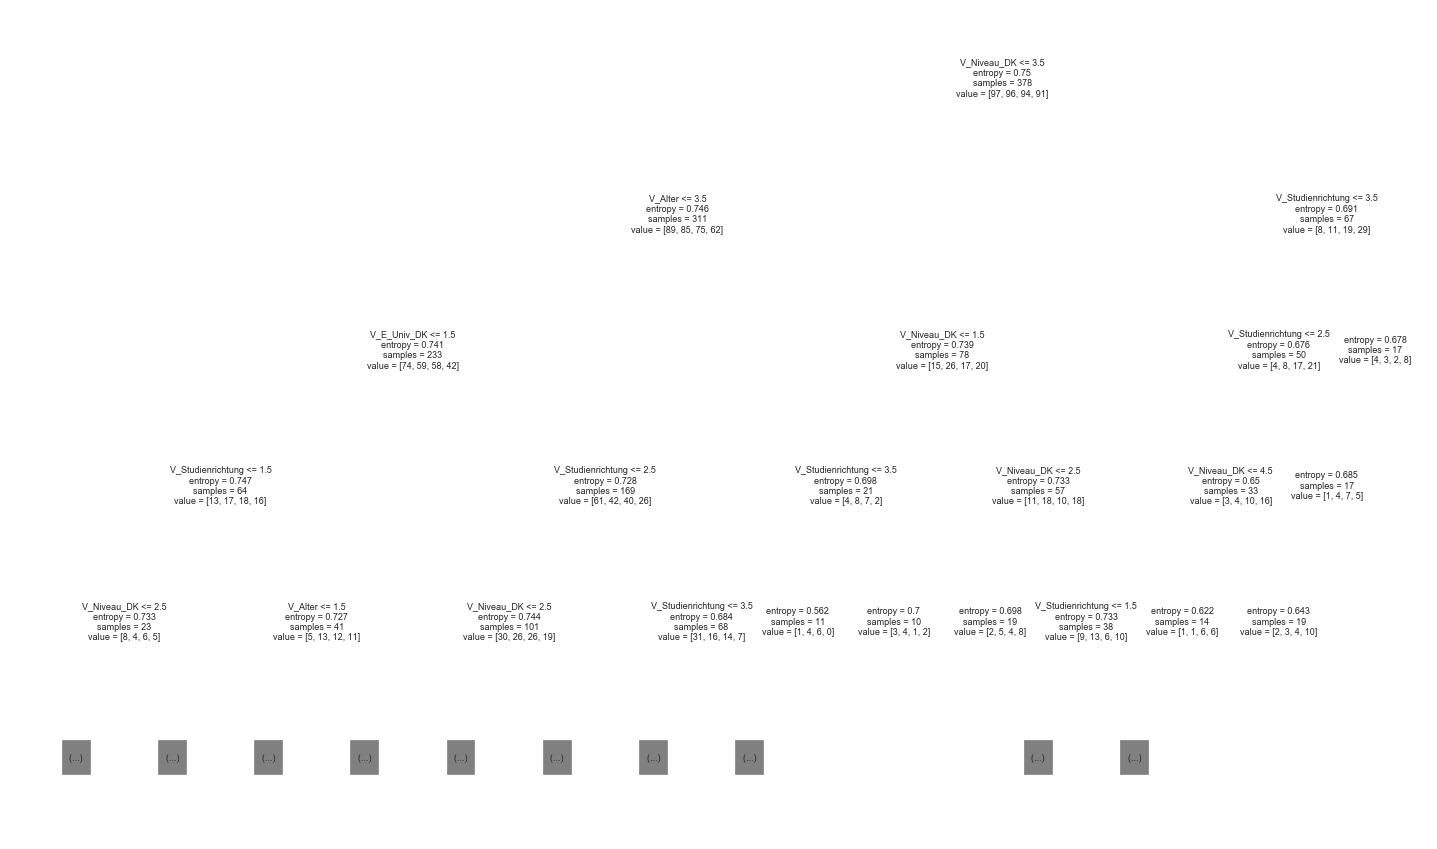

In [36]:
plt.figure(figsize = (25,15))
fig = tree.plot_tree(clf1, max_depth=4, feature_names=lst_4var, fontsize=9)
show(fig)